<font size="+3">Module 16 - Introduction to Convolutional Neural Network</font>

In this notebook, we will:
- We will be following the AI Project Cycle for the entire project. 
- An AI Project Cycle helps to create solutions efficiently, quickly and have an overview of the entire process.
- We further proceed step-wise starting from defining a problem, acquiring data, exploring it, and then we model the data
- Finally we evaluate the model.This helps to have effective solution for the problem.

****AI Project Cycle****
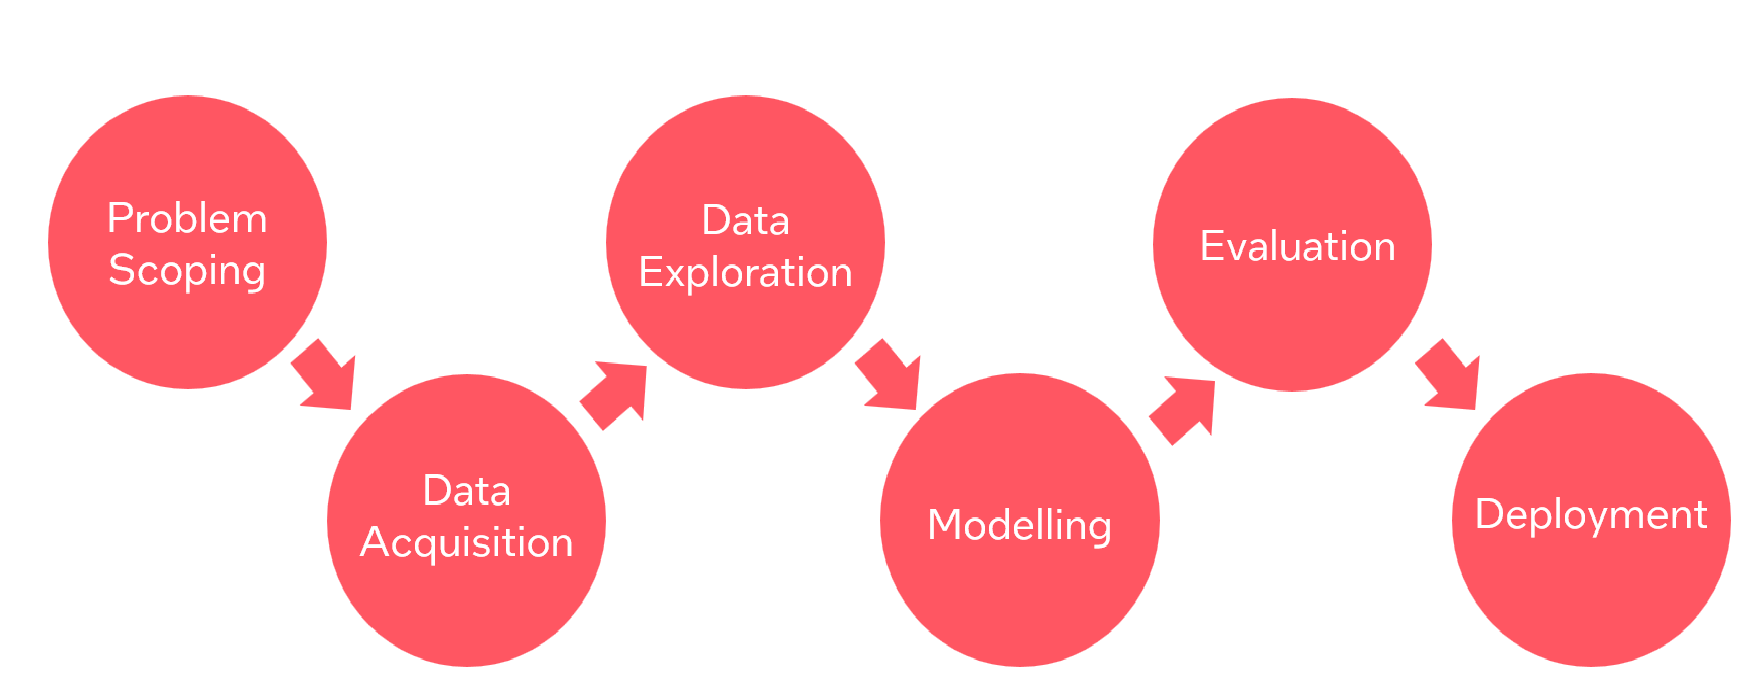

## Problem Scoping - Understanding the Problem Statement (AI Project Cycle - Step 1)

Rising Temperature of Earth's surface - Future Temperature Predicition

Computers Vision draws inspiration directly from the human visual system. Using Convolutional Neural Network we can identify the cards of different colors. This could help in understanding how applicatons like Face Detection, Object Dectection, Self Driving Cars works.



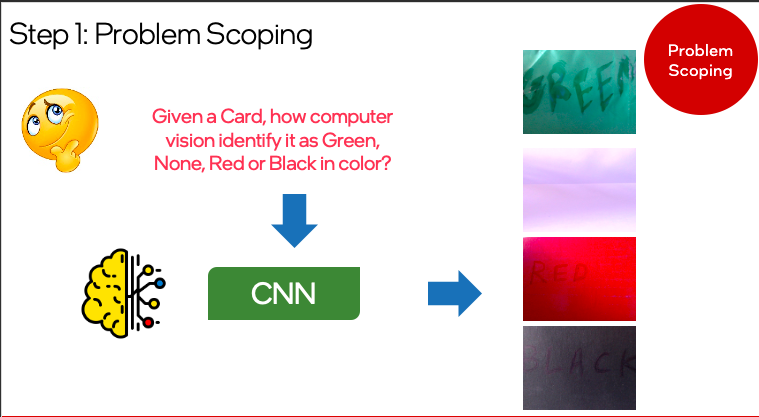

## Dataset - Data Acquisition (AI Project Cycle - Step 2)

Source - https://www.kaggle.com/competitions/cifar-10/data

In **CIFAR-10**, there are **60000**, **32x32** color images from these **10 classes**, with **6000** images from each class. The **training dataset** contains **50000** training images and the **test dataset** contains **10000** test images.
<br><br>
The dataset images are of color images with a **(32 x 32)** resolution. All the images in the dataset are of shape **(32,32,3)** where **3** represents the **number of channels** i.e **R-G-B** (Red,Green & Blue).


<img src="./images/cifar.png" width="800" height="400" align="center">


### Import the useful Packages and Libraries

In [3]:
# getting started with the model 
# importing required libraries/packages 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf


# Imports related to different layers that are to be included in CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

from PIL import ImageFont

# to ignore unwanted warnings
import warnings 
warnings.filterwarnings('ignore')

### Load/Read the Dataset

The **keras module** has **inbuilt datasets** and **cifar-10** is one among them. So we can simply import the dataset from keras 

In [2]:
# Importing the CIFAR-10 dataset from Keras 
#from tensorflow.keras.datasets import cifar10
#(X_train, Y_train), (X_test, Y_test) = cifar10.load_data() #dividing the dataset into training and testing sets.

**For our case**, we changed the way of loading our dataset in such a way to **mimick the CIFAR-10 style**. 

This is how we can load our images from your Windows path **using TensorFlow’s tf.data API**
and then convert the datasets to NumPy arrays — mimicking the CIFAR-10 style of having (X_train, Y_train) and (X_test, Y_test).

**Note:** On Windows, it’s best to either use raw strings (prefix the path with r) or use double backslashes.

#### Using the tf.data API
For more flexibility and efficiency (especially with large datasets), you can use TensorFlow’s tf.data **API**:

##### Step 1. Define Parameters and Paths

In [4]:
import tensorflow as tf
import numpy as np

# Parameters
batch_size = 32
img_height = 128  # Adjust to the input size required by your model
img_width = 128

# Dataset paths (use raw strings to avoid issues with backslashes)
train_dir = r"C:\Users\USER\AIKoronia\images\set1\training"
test_dir  = r"C:\Users\USER\AIKoronia\images\set1\testing"


##### Step 2. Load the Datasets Using image_dataset_from_directory
This function automatically infers labels from the subfolder names.

In [5]:
# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',           # Automatically infer labels from subfolder names
    label_mode='categorical',    # Use 'categorical' for one-hot encoded labels; use 'int' for integer labels
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True
)

# Load the testing dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=False  # Typically, you do not shuffle testing data
)

# Optional: Print out the class names to confirm (e.g., ['bad', 'good', 'moderate'])
print("Classes:", train_ds.class_names)


Found 147 files belonging to 3 classes.
Found 30 files belonging to 3 classes.
Classes: ['bad', 'good', 'moderate']


### Step 3. Convert the Datasets to NumPy Arrays
If your dataset is small enough to fit into memory, you can convert the tf.data.Dataset objects into NumPy arrays:

In [9]:
# Convert the training dataset to NumPy arrays
X_train = np.concatenate([images.numpy() for images, labels in train_ds], axis=0)
Y_train = np.concatenate([labels.numpy() for images, labels in train_ds], axis=0)

# Convert the testing dataset to NumPy arrays
X_test = np.concatenate([images.numpy() for images, labels in test_ds], axis=0)
Y_test = np.concatenate([labels.numpy() for images, labels in test_ds], axis=0)

# Display the shapes (they should be similar to what cifar10.load_data() returns)
print("X_train shape:", X_train.shape)  # Expected: (num_train_samples, img_height, img_width, 3)
print("Y_train shape:", Y_train.shape)  # Expected: (num_train_samples, num_classes)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (147, 128, 128, 3)
Y_train shape: (147, 3)
X_test shape: (30, 128, 128, 3)
Y_test shape: (30, 3)


**<p style="font-family: Arial; font-size:1.4em;color:green;">Knowledge Check: Write the code to shape of the train dataset?</p>**

In [11]:
print('X_train Shape: {}'.format(X_train.shape))
print('Y_train Shape: {}'.format(Y_train.shape))

X_train Shape: (147, 128, 128, 3)
Y_train Shape: (147, 3)


**<p style="font-family: Arial; font-size:1.4em;color:green;">Knowledge Check: Write the code to shape of the test dataset?</p>**

In [13]:
print('X_test Shape: {}'.format(X_test.shape))
print('Y_test Shape: {}'.format(Y_test.shape))

X_test Shape: (30, 128, 128, 3)
Y_test Shape: (30, 3)


In [15]:
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

Y_train shape: (147, 3)
Y_test shape: (30, 3)


### View the data

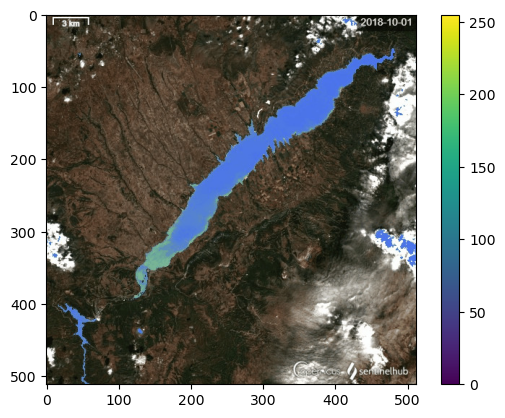

In [17]:
import matplotlib.pyplot as plt

# Use a raw string for the path
image_path = r"C:\Users\USER\AIKoronia\images\set1\training\good\S2L2A-1155520006888740-timelapse-28.jpg"

# Load and display the image
img = plt.imread(image_path)
plt.imshow(img)
plt.colorbar()
plt.show()


## Data Preprocessing - Data Exploration(AI Project Cycle - Step 3)

**Normalizing and One-Hot Encoding**


To **lower the pixel values**, we must first **normalise** the data. All of the image pixels **are** currently **in the range of 0–255**, and we want them **to be** in the range of **0 and 1**. So we can either divide all the pixel values by 255.0 or use the ‘normalize’ command from keras library. As CIFAR-10 has 10 classes, we are using the ‘to_categorical()’ method to **one-hot encode** the data.

### Normalizing

In [19]:
# Normalizing
X_train = X_train/255
X_test = X_test/255

### One-Hot-Encoding

### One-Hot Encoding

Machine learning algorithms require numerical input data. **Categorical data**, which contains text labels (e.g., "apple," "orange," "banana"), needs to be converted into a **numerical format** for the model to process it.

- Simply assigning unique integer values (like 1, 2, 3) to categories introduces an unintended order, which can mislead the model, as it may interpret a ranking where none exists.

- One-Hot Encoding eliminates this issue by representing **each category as a binary vector**, making each category equally distant from the others.

**Example of One-Hot Encoding**

- Suppose we have a column in a dataset with the categories ["blue", "green", "red"]:

- "blue" would be represented as [1, 0, 0]
- "green" would be represented as [0, 1, 0]
- "red" would be represented as [0, 0, 1]

Now, each row with a **categorical label** is represented by **a binary vector**, which can be fed into machine learning models.



In [29]:
# One-Hot-Encoding
Y_train_en = Y_train #to_categorical(Y_train,3)
Y_test_en = Y_test #to_categorical(Y_test,3)

In [31]:
print("After one-hot encoding, Y_train_en shape:", Y_train_en.shape)
print("After one-hot encoding, Y_test_en shape:", Y_test_en.shape)

After one-hot encoding, Y_train_en shape: (147, 3)
After one-hot encoding, Y_test_en shape: (30, 3)


- **to_categorical()**: This function **converts** a vector of integers (representing class labels) **into** a one-hot encoded matrix.

- **Parameter 3:**

- The **number 3** specifies the **total number of unique classes** in the dataset (e.g., 3 for digits 0-2 in the MNIST dataset).
- Each label in Y_train will be converted into a one-hot vector of length 3.
- If a label is 2, the one-hot encoded vector will look like [0, 0, 1].

### Some basic layers

**1. Conv2D() -> Layer that performs 2D convolutions.**

- **Conv2D()** applies **a set of learnable filters (kernels)** to the input image
- each filter **slides** over the image spatially (height and width) and performs a **dot product** between the filter and portions of the input.
- This operation **extracts features** such as edges, textures, and patterns from the input image.
- The **number of filters** (specified by the filters parameter) determines how many **feature maps** are **generated**, with each feature map **highlighting different aspects** of the input.

**2. MaxPooling2D() -> Performs max pooling operation, using the filters we provide.**

- **MaxPooling2D()** is a layer in convolutional neural networks (CNNs) that performs **down-sampling** on **feature maps** using a maximum filter.
- MaxPooling2D() **reduces the spatial dimensions** (height and width) of the feature maps, helping to reduce computation and control overfitting.
- It works by **taking a filter** (e.g., 2x2 or 3x3) and **sliding it** across the **feature map**.
- For each region, **it outputs the maximum value**, hence the term **"max pooling."**
- This operation helps **retain important** features (like edges) while **discarding less important** details

**3. Flatten() -> Used to perform flattening before we pass to FC (Fully Connected) layers.**

- It converts **multi-dimensional data** (like the output of convolutional layers) into a **1-dimensional vector**.
- This step is **crucial before feeding** the data into **fully connected (FC)** layers.

**4. Dense() -> is a layer in neural networks, often used to create Fully Connected (FC) layers.**

- A **Dense layer** is a layer where **each neuron** is connected **to every neuron in the previous layer**, hence the term **fully connected**.
- It **performs a weighted sum of all inputs** and applies an **activation function** (like ReLU, sigmoid, or softmax).
- Dense layers are typically used at the end of a neural network, especially for classification or regression tasks, where they combine features extracted by previous layers **to make final predictions**.

**5. Dropout() -> Adds dropout to a layer.**

- **Dropout()** is a **regularization technique** used in neural networks **to prevent overfitting** by randomly **"dropping out" (setting to zero)** a fraction of the neurons during training.
- **overfitting:** when the model adapts too closely to the training data.
-  **causes of overfitting:** Too Complex Model, Insufficient Training Data and the model tries to memorize the small dataset instead of generalizing, Too Many Training Epochs

- During each training step, Dropout() randomly sets a specified fraction of input neurons to zero.
- This forces the network to **learn more robust features**, as it cannot rely on any single neuron.
- By adding dropout, the model **generalizes better to new data**, as it **reduces dependency on specific neurons** and prevents **co-adaptation** of neurons.
- The dropout rate (e.g., 0.5) defines the fraction of neurons to drop.yer.

### Some basic functions

**1. sequential() -> Used to initialize a Neural Network architecture to which different layers can be added.**


- **Sequential()** is **a class** in deep learning **frameworks** (like Keras in TensorFlow) **used to build** a neural network as a linear stack of layers.

- Sequential() allows you **to create a neural network model** where **layers** are added **in sequence**, one after the other, from input to output.

- This type of model is suitable for simple, feedforward architectures where each layer has exactly one **input tensor** and one **output tensor**, making it straightforward to stack layers in order.

- **How Sequential() Works**

- **Initialize the Model:** Sequential() is used to initialize an empty model.
  
- **Add Layers:** You can add layers (like Dense, Conv2D, Flatten) one by one in the desired order using the add() method.

- **Compile and Train:** Once all layers are added, you can compile and train the model.

**Tensor** = τανυστής 

- A **tensor** is **a multi-dimensional array** used to represent data in deep learning and machine learning.
- Tensors are the fundamental **data structures** for performing computations in frameworks like TensorFlow and PyTorch.
- A tensor can represent **scalars** (0D, single values), **vectors** (1D arrays), **matrices** (2D arrays), or **higher-dimensional** data.

- **Examples** in deep learning:
- An **image** can be represented as a **3D tensor** (height, width, channels).
- A **batch of images** is a **4D tensor** (batch size, height, width, channels).

**2. summary() -> Provides a brief display of CNN architecture** 

- asdadasd

**3. compile() -> Compile defines the loss function, the optimizer and the metrics.**

- **compile()** is a **method** in deep learning frameworks (like Keras in TensorFlow) that configures the neural network for training.

- The compile() method **defines three** essential components:

- **Loss Function:**

- The loss function measures the difference between the predicted output and the true target values.

- The network minimizes this loss during training to improve performance.

- **Examples:**

- For regression: **mean_squared_error**

- For binary classification: **binary_crossentropy**

- For multi-class classification: **categorical_crossentropy**

- **Optimizer:**

- The optimizer determines **how the model's weights are updated** based on the loss function during training.

- **Examples:**

- **adam** (adaptive optimizer)

- **sgd** (stochastic gradient descent)

- **rmsprop** (RMS Propagation)

- **Metrics:**

- Metrics are used to monitor the model's performance during training and evaluation. These **do not affect** the training process but **provide insights**.

- **Examples:**

- **accuracy** (for classification tasks)

- **mean_absolute_error** (for regression tasks)

**4. fit()-> Trains the model using the CNN architecture and training data.**

**fit()** is a **method** in deep learning frameworks (like Keras in TensorFlow) that **trains** a neural network model on the provided data using the specified architecture and parameters.

**Purpose of fit()**

- The fit() function **performs the training** of the model by:

- **Feeding Training Data:** It takes the input features (X) and target labels (y) and iteratively trains the model **to minimize the loss function**.

- **Backpropagation and Optimization:** During each **epoch** (a **full pass** over the training data), it **adjusts** the model’s **weights** using the specified optimizer.

- **Monitors Progress:** Tracks performance metrics (e.g., accuracy, loss) during training and validation, if validation data is provided.
  
**Key Parameters of fit()**

- **x and y:** Training data (x for input features, y for target labels).
- **epochs:** Number of times the model will see the entire training dataset.
- **batch_size:** Number of samples processed before the model updates its weights.
- **validation_data:** Optional data to evaluate the model's performance on unseen data after each epoch.
- **callbacks:** Optional functions (like Early Stopping) to monitor and control the training process dynamically.

**5. evaluate() -> Performs evaluation on test data.**

hhfhgfghfh

## Modelling (AI Project Cycle - Step 4)

### CNN Model

In [33]:
# Base Model
Base_Model = Sequential()
#

Base_Model.add(Conv2D(32,(4,4),input_shape = (128,128,3),activation='relu'))
# This Conv2D layer will apply 32 filters of size 4x4 to the input, 
# producing 32 feature maps, with ReLU as the activation function for each output.

Base_Model.add(MaxPooling2D(pool_size = (2,2)))
# the MaxPooling2D layer will reduce the dimensions of each feature map 
# by taking the maximum value in each 2x2 region and moving by 2 pixels (stride of 2).

Base_Model.add(Conv2D(32,(4,4),input_shape = (128,128,3),activation='relu'))
Base_Model.add(MaxPooling2D(pool_size = (2,2)))

Base_Model.add(Flatten())
# Flatten() reshapes the 3D output tensor of the convolutional layers into a 1D vector,
# enabling it to be passed to the FC layers for classification or regression tasks.

# Here the 3D tensor input is (128,128,3)
# First Conv2D Layer: Conv2D(32, (4, 4), activation='relu')
# Filters = 32: The number of output channels.
# Kernel Size = (4, 4): Convolutional filter size.
# By default, padding='valid', so no padding is applied.
   # Padding is a technique used in neural networks, particularly in convolutional layers, 
   # to add extra pixels around the edges of an input tensor (e.g., an image) 
   # before performing the convolution operation.
   # Padding values: 'valid' (default) or 'same'
# Formula for Output Dimensions (for padding='valid'): Output Size=Input Size−Kernel Size+1

# Height or Width=(H−F+1), where H is the input dimension, and F is the filter size.
# For padding value = 'same', then Output Size=Input Size

# Calculations:

# Height = 128 − 4 + 1 = 125
# Width = 128 − 4 + 1 = 125
# Channels = 32 (number of filters)
# Output Shape: (125, 125, 32)

# 3. First MaxPooling2D Layer: MaxPooling2D(pool_size=(2, 2))
# Reduces the height and width by the pooling size.
# Formula:
# Height or Width=H/P, Where P is the pooling size.

# Calculations:
# Height = 125/2=62 (integer division)
# Width = 125/2=62
# Channels remain the same = 32
# Output Shape: (62, 62, 32)

# The same for the 2nd Conv2D layer: Height =  62 − 4 + 1 = 59, Width = 62 − 4 + 1 = 59, Channels = 32 (number of filters)
# The same for the 2nd maxPooling2D layer: Height = 59/2= 29, Width = 59/2= 29, Channels = 32
# So, before Flatten(), the output tensor shape is (29, 29, 32) 

# After Flatten:
# Flatten converts the 3D tensor into a 1D vector
# Formula: Length=Height×Width×Channels
# Calculations: Length=29×29×32 = 26912
# Output Size = 26912

# SOS

# HOW do we proceed from the 26912x1 Output of the Flattening
# to the 128x1 initial FC layer?

# The mapping from a larger number of neurons (e.g., the flattened vector)
# to a smaller number of neurons in the fully connected layer 
# is achieved through a matrix multiplication operation 
# followed by an activation function. 

# Let the flattened input vector have a size  n 
# (n = H(Height) x W(width) x C (Channels)

# Let the fully connected layer have m neurons (m<n)

# The fully connected layer is defined by a weight matrix W of size m x n

# where each row corresponds 
# to the weights for a single neuron in the fully connected layer.

# Additionally, there is a bias vector b of size m

# The mapping is done using the following operation: z = W . x + b
# x is the flattened input vector (size n)
# W is the weight matrix (size m x n)
# b is the bias vector (size m)
# z is the output vector (size m)
# Each of the m neurons computes a weighted sum of all the 
# n inputs, plus a bias.

# After the matrix multiplication, the output z is passed through 
# an activation function (e.g., ReLU, sigmoid, tanh) 
# to introduce non-linearity.

# Conceptually, this "compression" enables the network 
# to extract the most relevant features from the
# input vector while discarding redundant or less significant information.


Base_Model.add(Dense(128, activation ='relu'))
# This command adds a fully connected (Dense) layer to the model
# with 128 neurons and the ReLU activation function.

Base_Model.add(Dense(3, activation ='softmax'))
# adds a Dense (fully connected) layer with 10 neurons to the model, 
#                using the softmax activation function.
# It connects all the neurons in the current layer to every neuron in the previous layer.
# The number of neurons in this layer is 10, 
#       which typically corresponds to the number of output classes in a classification problem

# The 'softmax' activation function is used to calculate the probabilities of each class
# It outputs a vector of length 10 (one value per neuron), where: pi = e^zi / Σ(j=1 to j=10) e^zj
# Each value lies between 0 and 1, representing the likelihood of each class.

# Prediction: The class with the highest probability in the softmax output is chosen
#                 as the predicted class.
# This layer is ideal for multi-class classification tasks.

Base_Model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])
# This command configures the model for training by defining 
#                the loss function, optimizer, and performance metrics.
# Loss Function: Measures the error = difference between the predicted output and the true labels 
#               during training.
# 'Categorical Cross-Entropy': is used for multi-class classification tasks where
#       The output labels are one-hot encoded (e.g., [0, 0, 1] for 3 classes)
# It calculates the loss as: Loss = -Σ(i) yi*log(_yi)
# where yi is the  true label (1 for the correct class, 0 otherwise) and _yi is the predicted
#      probability for class I
# The model aims to minimize this loss during training.

# optimizer:  Determines how the model's weights are updated 
#                   during training based on the computed loss.
# optimizer='adam': Combines the advantages of momentum and adaptive learning rate techniques

# metrics=['accuracy']:  Metrics are used to evaluate the model's performance during training and testing.
# Accuracy: Tracks the percentage of correctly classified samples during training.


**ReLU Layers** (**Rectified Linear Unit layers**) are a type of **activation function** layer used in neural networks.

- It is defined by the function: **f(x)=max(0,x)**
- which means that it outputs the input directly if it is positive, otherwise, it outputs zero.
- In other words, ReLU **"rectifies"** the input by **setting any negative values to zero**, while **keeping positive values unchanged**.

- **Purpose of ReLU Layers**
- **Non-linearity:** Although ReLU itself is a simple linear function for positive values, applying it **introduces non-linearity** into the model, which helps neural networks learn complex patterns and representations.
- **Efficiency:** ReLU is **computationally efficient** because it involves **simple thresholding at zero**, which can be calculated quickly.
- **Avoiding Vanishing Gradients:** ReLU helps to mitigate the problem of vanishing gradients, which can hinder the learning process in deep networks. Unlike some other activation functions (e.g., sigmoid or tanh), ReLU **does not compress outputs** into a limited range, allowing gradients to remain strong in the positive range.

**<p style="font-family: Arial; font-size:1.4em;color:green;">Knowledge Check: Write the code to print Base_Module summary?</p>**

In [35]:
Base_Model.summary()
# it is an essential method 
# to visualize and validate the structure of a neural network before training.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 125, 125, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 59, 59, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 26912)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,444,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,463,235 (13.21 MB)

 Trainable params: 3,463,235 (13.21 MB)

 Non-trainable params: 0 (0.00 B)

## Evaulation (AI Project Cycle - Step 5)

### Change the number of epochs and observe the changes in accuracy

In [37]:
historyBase = Base_Model.fit(X_train, Y_train_en, batch_size=16, epochs = 5, verbose=1,validation_data=(X_test,Y_test_en))

# is used to train the neural network model Base_Model using the training data (X_train, Y_train_en)
# and evaluate its performance on validation data (X_test, Y_test_en) after each epoch. 

# The fit() method trains the model by iteratively optimizing its weights 
#           to minimize the loss function using the specified optimizer.
# It uses the provided input (X_train) and target labels (Y_train_en) for training.
# Arguments: 
    # X_train: The training data (features) provided as input to the model.
    # Y_train_en: The corresponding one-hot-encoded target labels for the training data.
    # epochs=5: Specifies the number of complete passes over the training dataset. 
    # The model will train for 5 epochs.
    # verbose=1: Controls the verbosity of the output during training. (verbose = with too many words, φλύαρος)
#             1 means progress bars and metrics are displayed during training.
#             0 means silent mode.
#             2 means epoch-level output only.
     # validation_data=(X_test, Y_test_en)
# Validation data is used to evaluate the model's performance after each epoch.
#             X_test: Input features for validation.
#             Y_test_en: One-hot-encoded target labels for validation.
# The fit() method returns a history object (here, historyBase), 
#     which stores training metrics (e.g., loss, accuracy) and validation metrics for each epoch.

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 421ms/step - accuracy: 0.3622 - loss: 1.8718 - val_accuracy: 0.4333 - val_loss: 1.0945
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 362ms/step - accuracy: 0.5095 - loss: 1.0798 - val_accuracy: 0.4333 - val_loss: 1.1083
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 358ms/step - accuracy: 0.5467 - loss: 1.0345 - val_accuracy: 0.4333 - val_loss: 1.0870
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.5399 - loss: 1.0255 - val_accuracy: 0.4333 - val_loss: 1.0754
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 355ms/step - accuracy: 0.4941 - loss: 1.0107 - val_accuracy: 0.4333 - val_loss: 1.7980


- **Epoch:** One complete pass over the entire training dataset.
- **Batch Size:** The number of samples in each batch during training.
- **Steps per Epoch:** The number of batches required to complete one epoch. Calculated as:
-  Steps per Epoch = Total Samples / Batch Size

**What Happens During Training:**

- The model performs **forward and backward passes** over the X_train data to minimize the loss using the optimizer.
- At the end of each epoch:

- It computes the loss and metrics (like accuracy) on both the training and validation datasets.
- These metrics **are printed (because verbose=1)** and stored in the historyBase object.

In [39]:
evaluationBase = Base_Model.evaluate(X_test, Y_test_en)
print('Test Accuracy of Base Model: {}'.format(evaluationBase[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.4333 - loss: 1.7980
Test Accuracy of Base Model: 0.4333333373069763


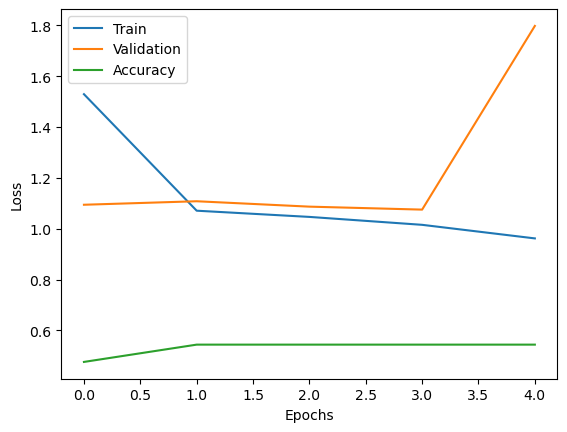

In [41]:
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(historyBase)

In [14]:
#clearning up memory MANDATORY
import gc
gc.collect()

# gc = garbage collection

4874

### Adding Dropouts

In [47]:
# Model_1 with Dropouts
DropoutModel = Sequential()
DropoutModel.add(Conv2D(64,(4,4),input_shape=(128,128,3),activation='relu'))
DropoutModel.add(MaxPooling2D(pool_size=(2,2)))
DropoutModel.add(Dropout(0.5)) 
DropoutModel.add(Conv2D(64,(4,4),input_shape=(128,128,3),activation='relu'))
DropoutModel.add(MaxPooling2D(pool_size=(2,2)))
DropoutModel.add(Dropout(0.25))
DropoutModel.add(Flatten())
DropoutModel.add(Dense(256,activation='relu'))
DropoutModel.add(Dense(3,activation='softmax'))
DropoutModel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Dropout Module Summary

In [49]:
DropoutModel.summary()
DropoutHistory = DropoutModel.fit(X_train, Y_train_en,  batch_size=16, epochs = 5, verbose=1, validation_data=(X_test,Y_test_en))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 125, 125, 64)        │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 59, 59, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 53824)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      13,779,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,848,707 (52.83 MB)

 Trainable params: 13,848,707 (52.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.2779 - loss: 4.3670 - val_accuracy: 0.4333 - val_loss: 1.0967
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5862 - loss: 1.0891 - val_accuracy: 0.4333 - val_loss: 1.0926
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5036 - loss: 1.0857 - val_accuracy: 0.4333 - val_loss: 1.0883
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5344 - loss: 1.0741 - val_accuracy: 0.4333 - val_loss: 1.0839
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5361 - loss: 1.0599 - val_accuracy: 0.4333 - val_loss: 1.1120


In [53]:
# To test accuracy of dropout model with dropouts
Dropevaluation = DropoutModel.evaluate(X_test, Y_test_en)
print('Test Accuracy of DropoutModel(with Dropouts): {}'.format(Dropevaluation[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.4333 - loss: 1.1120
Test Accuracy of DropoutModel(with Dropouts): 0.4333333373069763


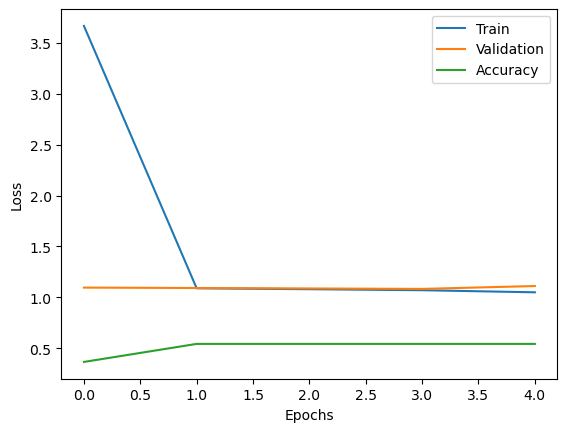

In [55]:
# Visulazing dropout history
def plotloss(history_1):
    plt.plot(history_1.history['loss'])
    plt.plot(history_1.history['val_loss'])
    plt.plot(history_1.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(DropoutHistory)

When the model with dropout has ran for **30 epochs**, the validation accuracy increased from 67% to 71% and also the reduction in models validation loss can be clearly observed.


When ran for 20 epochs, the accuracy jumps to 86.9% and the testing accuracy reaches 67.12%. 

But one key thing to observe is that, the validation loss kept continously increasing which is a sign of overfitting. 


## Deployment (AI Project Cycle - Step 6)

Making predictions is a part of the deployment stage of AI project cycle - Not Applicable 

#### Step 1. save the model

In [63]:
# Save your model to an HDF5 file (or use the TensorFlow SavedModel format)
#Base_Model.save("AIKoroniamodel.h5")
Base_Model.save('AI_Koronia_Model.keras')

#### Step 2. create a Streamlit App

Create a new Python file (for example, app.py) and add the following code. This code will:

Load your saved model.

Provide an image uploader widget.

Preprocess the uploaded image.

Use the model to predict the class.

Display the image and prediction results.

In [68]:
import streamlit as st
import tensorflow as tf
from PIL import Image, ImageOps
import numpy as np

# -----------------------------
# 1. Load the model
# -----------------------------
# Use st.cache to avoid reloading the model on every interaction.
@st.cache(allow_output_mutation=True)
def load_model():
    # Adjust the path if necessary
    model = tf.keras.models.load_model("AI_Koronia_Model.keras")
    return model

model = load_model()

# -----------------------------
# 2. Streamlit App Title and Description
# -----------------------------
st.title("Image Classification App")
st.write("Upload an image and the model will predict its class.")

# -----------------------------
# 3. Image Upload Widget
# -----------------------------
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Open and display the image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    st.write("")
    st.write("Classifying...")
    
    # -----------------------------
    # 4. Preprocess the Image
    # -----------------------------
    # Adjust this section based on the preprocessing used during training.
    # For example, if your model expects 128x128 images scaled between 0 and 1:
    img_size = (128, 128)  # Change this if your model uses a different input size.
    
    # Resize the image (keeping aspect ratio might be important depending on your model)
    image = ImageOps.fit(image, img_size, Image.ANTIALIAS)
    
    # Convert the image to a NumPy array
    img_array = np.array(image)
    
    # If your training images were normalized, do the same here
    img_array = img_array.astype("float32") / 255.0
    
    # Expand dimensions so the image becomes a batch of size 1
    img_array = np.expand_dims(img_array, axis=0)
    
    # -----------------------------
    # 5. Make a Prediction
    # -----------------------------
    prediction = model.predict(img_array)
    
    # Assuming your model outputs a probability for each class,
    # and you want to take the class with the highest probability.
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Optionally, define a mapping from class index to class label:
    class_names = ["bad", "good", "moderate"]  # Adjust based on your training setup
    predicted_label = class_names[predicted_class]
    
    st.write(f"**Prediction:** {predicted_label}")
    st.write("**Prediction Probabilities:**", prediction)


2025-02-08 21:40:02.749 
  command:

    streamlit run C:\Users\USER\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `load_model()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function load_model at 0x000001F5C3D54AE0>
```

Please see the `hash_funcs` [documentation](https://docs.streamlit.io/library/advanced-features/caching#the-hash_funcs-parameter)
for more details.
            

In [70]:
import tensorflow as tf
print(tf.__version__)


2.17.0
